# Proyek Analisis Data: Nama dataset
- Nama: Rachmat Ramadhiansyah
- Email:rachmatramadhiansyah@gmail.com
- Id Dicoding:Rachmat Ramadhiansyah

## Menentukan Pertanyaan Bisnis

- pada musim  apa penyewaan terbanyak? untuk menentukan kpn sebaiknya di lakukan perawatan dan memastikan ketersediaan bikenya.
- Pada bulan pengguna casual terbanyak ? untuk menentukan kpn sebaiknya mengadakan promo membership untuk mengajak menjadi registered.


## Menyaipkan semua library yang dibuthkan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [56]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/analisis-data/Bike-sharing-dataset.zip \
  -O /tmp/bike_sharing.zip

--2023-11-29 12:44:49--  https://github.com/dicodingacademy/assets/raw/main/analisis-data/Bike-sharing-dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/analisis-data/Bike-sharing-dataset.zip [following]
--2023-11-29 12:44:49--  https://raw.githubusercontent.com/dicodingacademy/assets/main/analisis-data/Bike-sharing-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/zip]
Saving to: ‘/tmp/bike_sharing.zip’

/tmp/bike_sharing.z 100%[===================>] 273.43K  --.-KB/s    in 0.04s   

2023-11-29 12:44:49 (6.31 MB/s) - ‘/t

In [57]:
import zipfile,os
local_zip = '/tmp/bike_sharing.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/bike_sharing')
zip_ref.close()

In [58]:
os.listdir('/tmp/bike_sharing')

['day.csv', 'hour.csv', 'Readme.txt']

In [59]:
bike_df = pd.read_csv("/tmp/bike_sharing/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [60]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [61]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [62]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


In [63]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Tidak di lakukan cleaning Data, karena tidak ada missing value dan duplikasi data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [64]:
bike_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [65]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])

monthly_bike_df = bike_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_bike_df.index = monthly_bike_df.index.strftime('%Y-%m')
monthly_bike_df = monthly_bike_df.reset_index()
monthly_bike_df.rename(columns={
    "instant": "id",
    "cnt": "total_cnt"
}, inplace=True)
monthly_bike_df.head()

,dteday,id,total_cnt
0,2011-01,31,38189
1,2011-02,28,48215
2,2011-03,31,64045
3,2011-04,30,94870
4,2011-05,31,135821


In [66]:

bike_df['dteday'] =  pd.to_datetime(bike_df['dteday'])
bike_df['month'] =  bike_df['dteday'].dt.strftime('%B')
bike_df['year'] = bike_df.dteday.dt.year
bike_df['month_num'] = bike_df['dteday'].dt.month
bike_df['total riders'] = bike_df['casual'] + bike_df['registered']
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,month_num,total riders
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,January,2011,1,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,January,2011,1,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January,2011,1,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January,2011,1,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January,2011,1,1600


In [67]:
seasons_map= {1: 'winter',
                   2: 'spring',
                   3: 'summer',
                   4: 'fall'}
bike_df['season'] = bike_df['season'].map(seasons_map)

In [68]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,year,month_num,total riders
0,1,2011-01-01,winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,January,2011,1,985
1,2,2011-01-02,winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,January,2011,1,801
2,3,2011-01-03,winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January,2011,1,1349
3,4,2011-01-04,winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January,2011,1,1562
4,5,2011-01-05,winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January,2011,1,1600


## Visualization & Explanatory Analysis

### Pertanyaan 1:

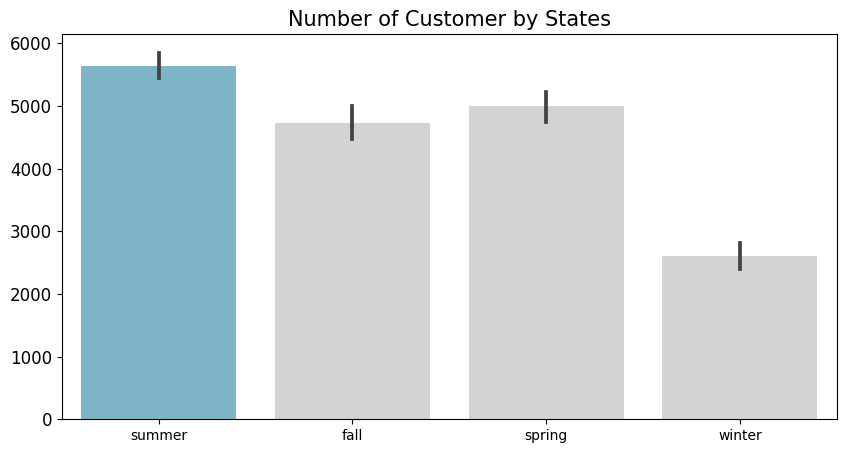

In [69]:
#untuk mengetahui berapa banyak jumlah penyewa per sesason
bike_df.groupby(['season','year','month'])['cnt'].sum()


plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sn.barplot(
    x="season",
    y="cnt",
    data=bike_df.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2:

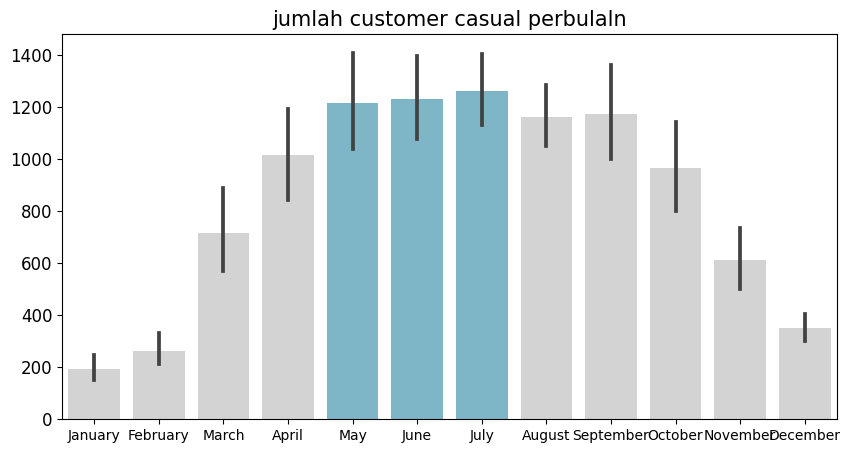

In [74]:
#untuk mengetahui berapa banyak jumlah penyewa yang belum registered
bike_df.groupby(['year','month'])['casual'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))

colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3","#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sn.barplot(
    x="month",
    y="casual",
    data=bike_df.sort_values(by="mnth", ascending=True),
    palette=colors_
)
plt.title("jumlah customer casual perbulaln", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jumlah penyewa terbanyak ada pada musim summer, sehingga untuk sebelum summer bisa dipersiapkan ketersediaannya.
- conclution pertanyaan 2 : Jumlah penyewa terbanyak yang belum menjadi member/registered ada pada bulan May, Juni, July, sehingga bulan tersebut bisa di adakan promo untuk menjadi member.